In [ ]:
2nd Problem Statement: Regression Probelm: To predict time required to resolve a support ticket.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data='D:/MAchine Learning/Dataset/Sept-March data - Sheet.csv'

In [5]:
df=pd.read_csv(data,sep=',')

# Support Ticket Data

In [ ]:
#df 

In [7]:
df.drop(['Contact ID','Full name','Email Address','Tags','Survey results','Association type','Internal agent','Internal group','Every response status','Product','Biz ID','Biz Name','POS','POS Name','Aggregator name','Source','Order Status','Username','UrbanPiper Store Name/ID','Item Name/ID','Product Name','Type of issue','Order ID','Username','Country','Option Name/ID','Date & Time'],axis=1,inplace=True)

In [8]:
df.columns

Index(['Ticket ID', 'Subject', 'Status', 'Priority', 'Type', 'Agent', 'Group',
       'Created time', 'Due by Time', 'Resolved time', 'Closed time',
       'Last update time', 'Initial response time', 'Time tracked',
       'First response time (in hrs)', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'Resolution status',
       'First response status', 'Product.1', 'Module', 'Merchant', 'Source.1',
       'Resolution Dependency', 'Username.1'],
      dtype='object')

In [9]:
df.drop(['Due by Time','Resolved time','Closed time','Last update time','Initial response time','Time tracked'],axis=1,inplace=True)

In [10]:
df.drop(['Username.1'],axis=1,inplace=True)

In [11]:
df.drop(['Source.1'], axis=1, inplace=True)

In [12]:
df.isna().sum()

Ticket ID                         0
Subject                          27
Status                            0
Priority                          0
Type                              0
Agent                             0
Group                             0
Created time                      0
First response time (in hrs)      0
Resolution time (in hrs)          0
Agent interactions                0
Customer interactions             0
Resolution status                65
First response status            42
Product.1                        36
Module                            0
Merchant                        100
Resolution Dependency           133
dtype: int64

In [13]:
df.nunique()

Ticket ID                       3296
Subject                         2416
Status                             7
Priority                           4
Type                               7
Agent                             14
Group                              6
Created time                    3248
First response time (in hrs)    2047
Resolution time (in hrs)        2989
Agent interactions                17
Customer interactions             36
Resolution status                  2
First response status              2
Product.1                          6
Module                             6
Merchant                         384
Resolution Dependency              9
dtype: int64

In [14]:
df['Resolution status'].value_counts() #Imblalanced but can be considered

Within SLA      2585
SLA Violated     646
Name: Resolution status, dtype: int64

In [ ]:
EDA masked

In [ ]:
# df['Module'].value_counts() #can be considered

In [ ]:
# df['Product.1'].value_counts() #Imblalanced but can be considered

In [ ]:
# df['Merchant'].nunique() #Imblalanced but can be considered

In [ ]:
# df['Resolution Dependency'].value_counts() #O/P

In [ ]:
# df['Group'].value_counts()  #Imbalanced Data

In [ ]:
# df['Subject'].value_counts() #NLP needs to be used

In [145]:
df.describe()

,Ticket ID,Agent interactions,Customer interactions
count,3296.000000,3296.000000,3296.000000
mean,134291.286408,2.164442,3.209345
std,4959.353000,1.663394,3.836790
min,125306.000000,0.000000,0.000000
25%,130320.750000,1.000000,1.000000
50%,134571.500000,2.000000,2.000000
75%,138632.000000,3.000000,4.000000
max,142502.000000,16.000000,56.000000


In [148]:
df['Resolution status'].value_counts() #SMOTE 

Within SLA      2585
SLA Violated     646
Name: Resolution status, dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ticket ID                     3296 non-null   int64 
 1   Subject                       3269 non-null   object
 2   Status                        3296 non-null   object
 3   Priority                      3296 non-null   object
 4   Type                          3296 non-null   object
 5   Agent                         3296 non-null   object
 6   Group                         3296 non-null   object
 7   Created time                  3296 non-null   object
 8   First response time (in hrs)  3296 non-null   object
 9   Resolution time (in hrs)      3296 non-null   object
 10  Agent interactions            3296 non-null   int64 
 11  Customer interactions         3296 non-null   int64 
 12  Resolution status             3231 non-null   object
 13  First response sta

In [19]:
for index, row in df.iterrows():
    index_p=row['First response time (in hrs)'].index(':')
    hrs=row['First response time (in hrs)'][:index_p]
    mins=row['First response time (in hrs)'][(index_p+1):-3]
    time=hrs+'.'+mins
    df['First response time (in hrs)'].iloc[index]=time

ValueError: substring not found

In [18]:
for index, row in df.iterrows():
    index_r=row['Resolution time (in hrs)'].index(':')
    hrs_r=row['Resolution time (in hrs)'][:index_r]
    mins_r=row['Resolution time (in hrs)'][(index_r+1):-3]
    time_r=hrs_r+'.'+mins_r
    df['Resolution time (in hrs)'].iloc[index]=time_r

In [154]:
df['First response time (in hrs)']=df['First response time (in hrs)'].astype('float')

In [155]:
r_df=df.drop(['Status','Ticket ID','Subject','Created time','First response time (in hrs)','Agent interactions','Customer interactions','Resolution status','First response status','Resolution Dependency'],axis=1)

In [156]:
r_df.isna().sum()

Priority                      0
Type                          0
Agent                         0
Group                         0
Resolution time (in hrs)      0
Product.1                    36
Module                        0
Merchant                    100
dtype: int64

In [157]:
r_df['Product.1'].value_counts()

Hub          2742
Prime         258
Meraki        227
Comet          18
Prime POS       9
Others          6
Name: Product.1, dtype: int64

In [ ]:
#r_df['Merchant'].value_counts()

In [159]:
import numpy as np

Replacing Null values

In [160]:
r_df["Product.1"] =r_df["Product.1"].replace({np.nan:'Others'}, regex=True)

In [161]:
r_df["Merchant"] =r_df["Merchant"].replace({np.nan:'Others'}, regex=False)

# Label Encoder

In [184]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [185]:
l_df=r_df

In [186]:
l_df['Type']=le.fit_transform(df['Type'])
l_df['Priority']=le.fit_transform(df['Priority'])
l_df['Agent']=le.fit_transform(df['Agent'])
l_df['Group']=le.fit_transform(df['Group'])
l_df['Product.1']=le.fit_transform(df['Product.1'])
l_df['Module']=le.fit_transform(df['Module'])
l_df['Merchant']=le.fit_transform(df['Merchant'])

In [187]:
#collinearity

<AxesSubplot:>

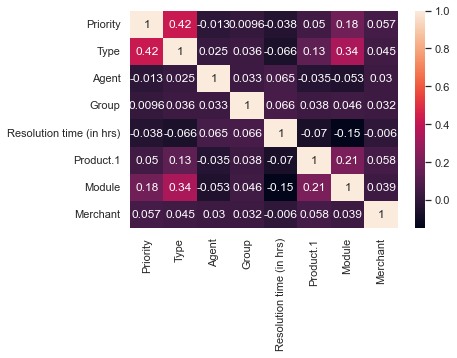

In [188]:
sns.heatmap(l_df.corr(),annot=True)

1. There's a relation between Type of issue and Priority & Type of module and Type of issues
   But since its less than 5, it cant be validated

In [214]:
from sklearn.preprocessing import StandardScaler

In [230]:
scaler = StandardScaler()

In [233]:
df_ss_r=scaler.fit_transform(r_df[['Merchant']])

In [234]:
df_ss_r

array([[ 1.94902542],
       [ 2.03251767],
       [ 1.86553317],
       ...,
       [-1.62026834],
       [-0.23220966],
       [ 2.03251767]])

In [235]:
r_df.drop(['Merchant'],axis=1,inplace=True)

In [237]:
r_df['Normalised_Merchant']=df_ss_r

In [268]:
r_df

,Priority,Type,Agent,Group,Resolution time (in hrs),Product.1,Module,Normalised_Merchant
0,1,6,5,3,26.00,1,5,1.949025
1,1,6,10,5,7.24,2,5,2.032518
2,1,6,5,3,1.09,1,5,1.865533
3,0,3,7,3,0.49,1,3,-0.587052
4,2,6,3,5,100.06,1,3,-0.587052
...,...,...,...,...,...,...,...,...
3291,1,6,1,3,24.50,1,0,0.049577
3292,0,3,8,3,0.00,1,1,-1.568086
3293,3,6,8,3,0.00,1,5,-1.620268
3294,0,6,8,3,0.00,1,3,-0.232210


In [269]:
l_df.nunique()

Priority                       4
Type                           7
Agent                         14
Group                          6
Resolution time (in hrs)    1928
Product.1                      7
Module                         6
Normalised_Merchant          385
dtype: int64

In [270]:
X=r_df.drop(['Resolution time (in hrs)'],axis=1)
y=r_df['Resolution time (in hrs)']

# Modeling

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
lr=LinearRegression()

In [275]:
lr.fit(X_train,y_train)

LinearRegression()

In [276]:
y_pred=lr.predict(X_test)

In [277]:
lr.coef_

array([ -2.23027842,  -0.35008572,   2.17495002,  28.10049816,
        -5.51150756, -12.63082546,   0.45972916])

In [278]:
lr.intercept_

19.332439515835247

In [279]:
from sklearn.metrics import mean_squared_error

In [280]:
mean_squared_error(y_test,y_pred,squared=False)

100.3044262963907

In [281]:
from sklearn.metrics import r2_score

In [266]:
r2score =r2_score(y_test,y_pred)
print(r2score*100,'%')

0.956670076831112 %


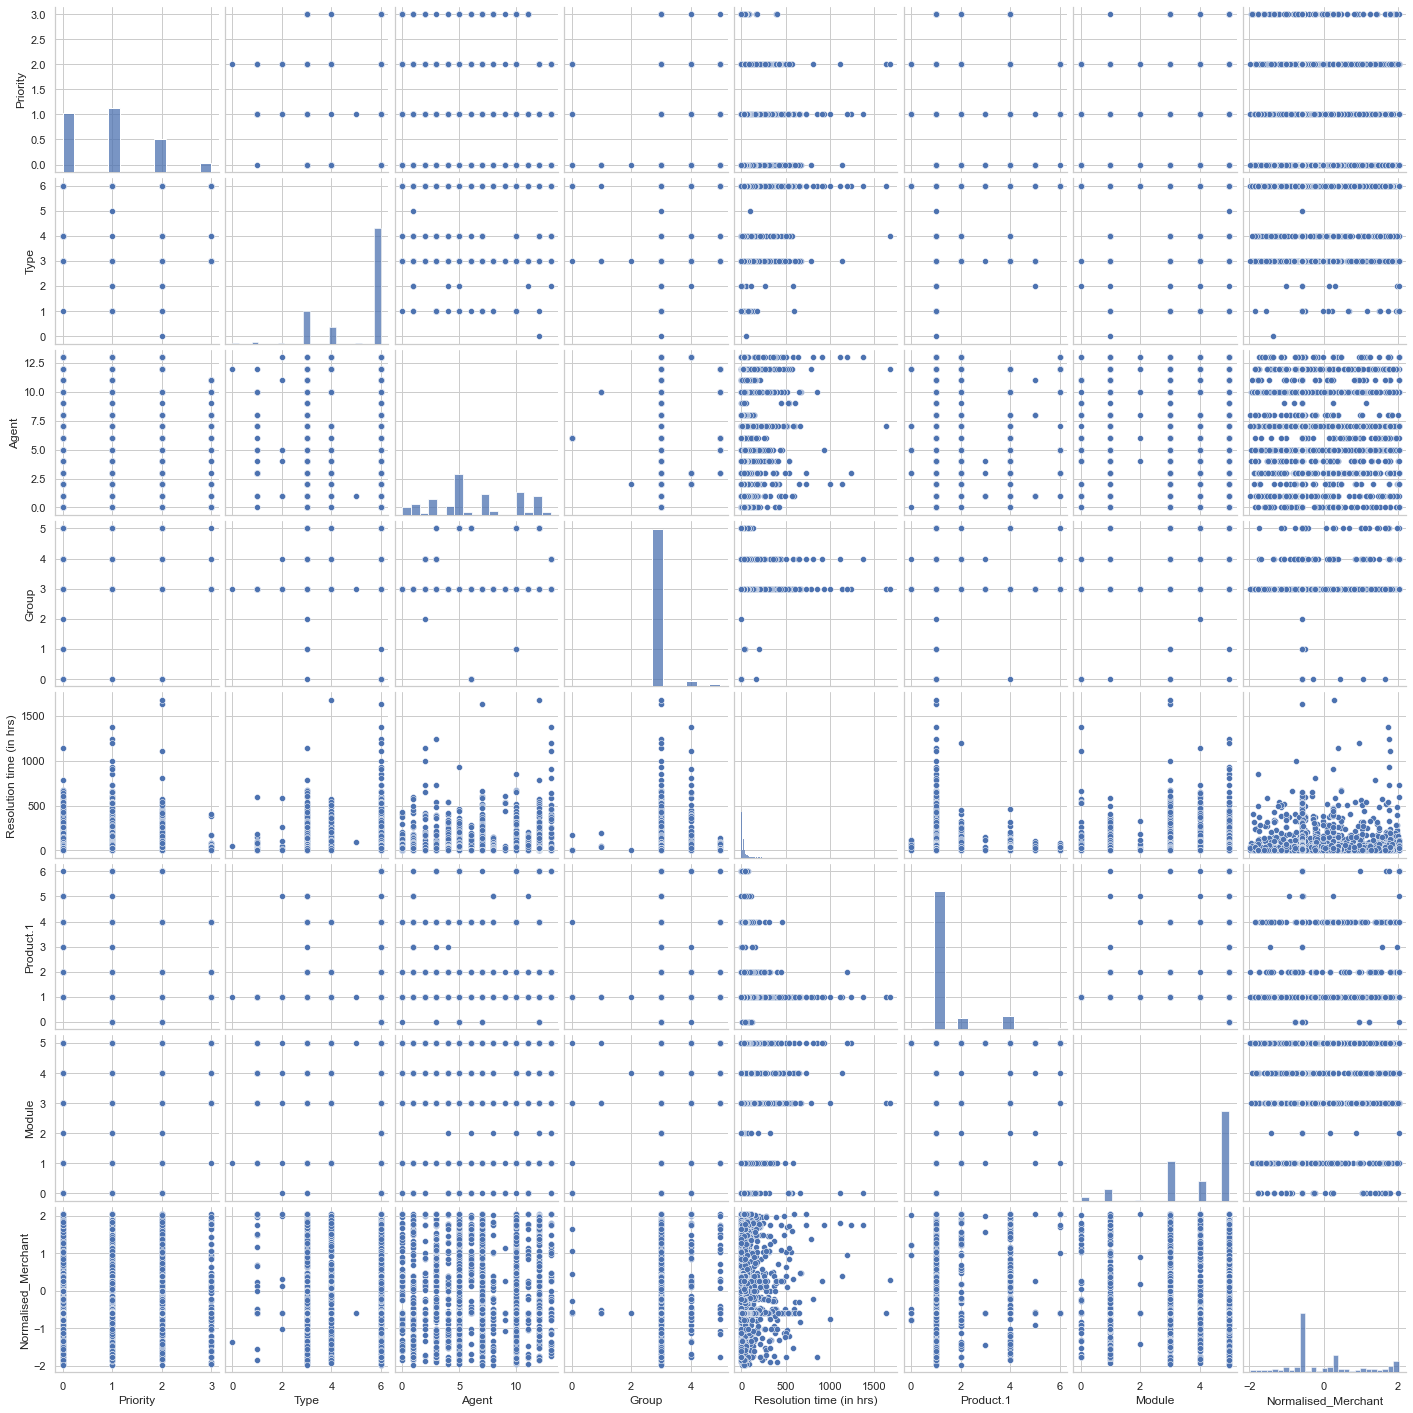

In [282]:
sns.pairplot(r_df)

In [283]:
from sklearn.svm import SVR


In [293]:
svr=SVR(kernel = 'linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [290]:
y_pred=svr.predict(X_test)

In [291]:
mean_squared_error(y_test,y_pred,squared=False)

107.85698033478943

In [292]:
r2score=r2_score(y_test,y_pred)
print(r2score*100,'%')

-14.520055855653657 %
